In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from utilities import consultar,pasar_a_DF,pasar_a_datetime
import os 
from datetime import datetime

## Wikipedia Surveys

In [3]:
# Change this path to run in your machine
home_path = 'C:/Users/54911/OneDrive/Documentos/git_repos/elecciones2023-arg'

In [4]:
os.chdir(home_path)

In [5]:
primera_vuelta = pd.read_csv('Elecciones + IA/getting_data/surveys/data_scraped/Survey_primera_vuelta.csv')
ballojate = pd.read_csv('Elecciones + IA/getting_data/surveys/data_scraped/Survey_ballotage.csv')

In [6]:
ballojate['Inicio'] = ballojate['Inicio'].map(lambda x:pasar_a_datetime(x))
ballojate['Final'] = ballojate['Final'].map(lambda x:pasar_a_datetime(x))
primera_vuelta['Inicio'] = primera_vuelta['Inicio'].map(lambda x:pasar_a_datetime(x))
primera_vuelta['Final'] = primera_vuelta['Final'].map(lambda x:pasar_a_datetime(x))

In [7]:
parties_ballotage = ballojate.columns[4:6]
parties_primera_vuelta = primera_vuelta.columns[4:9]

## Ploting time series

Text(0, 0.5, 'Porcentaje')

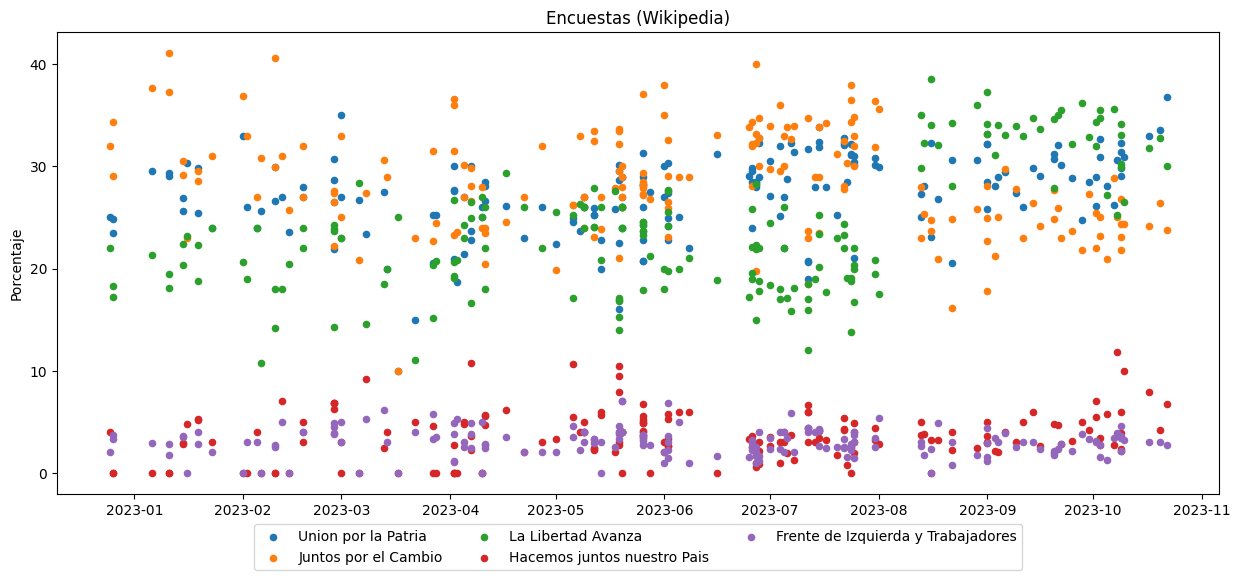

In [8]:
plt.figure(figsize=(15,6))
for p in parties_primera_vuelta:
    plt.scatter(primera_vuelta['Inicio'],primera_vuelta[p],label = p,s=20)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=3)
plt.title('Surveys (Wikipedia)')
plt.ylabel('Percentage')

Text(0, 0.5, 'Porcentaje')

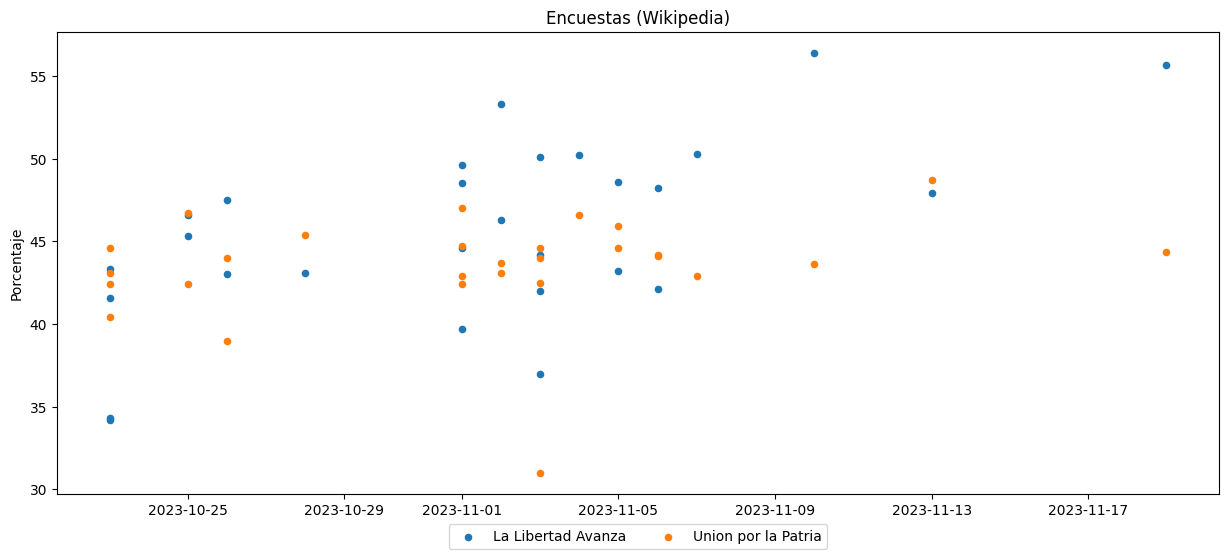

In [9]:
plt.figure(figsize=(15,6))
for p in parties_ballotage:
    plt.scatter(ballojate['Inicio'],ballojate[p],label = p,s=20)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=3)
plt.title('Surveys (Wikipedia)')
plt.ylabel('Percentaje')

## Inspecting data

In [ ]:
# has been moved from /surveys
# Some plots (move it to exploratory analisis)

primera_vuelta = pd.read_csv('FILL')
partidos = ['Union por la Patria','Juntos por el Cambio', 'La Libertad Avanza','Hacemos juntos nuestro Pais', 'Frente de Izquierda y Trabajadores']
colores = ['b','y','purple','black','r']
plt.figure(figsize=(15,7))
for i,p in enumerate(partidos):
    sns.scatterplot(data=primera_vuelta,y=p,x='Final', 
                    #ax=ploteos[i],
                    color=colores[i])


ballotage = pd.read_csv('FILL')
colores = ['b','y','purple','black','r']
plt.figure(figsize=(15,7))
for i,p in enumerate(partidos):
    sns.scatterplot(data=ballotage,y=p,x='Inicio', 
                    #ax=ploteos[i],
                    color=colores[i])
